In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [48]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

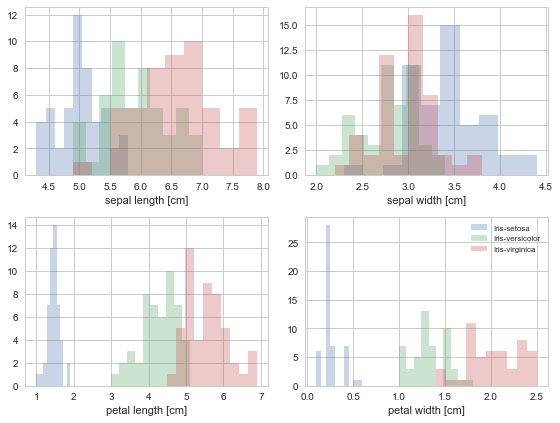

In [4]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

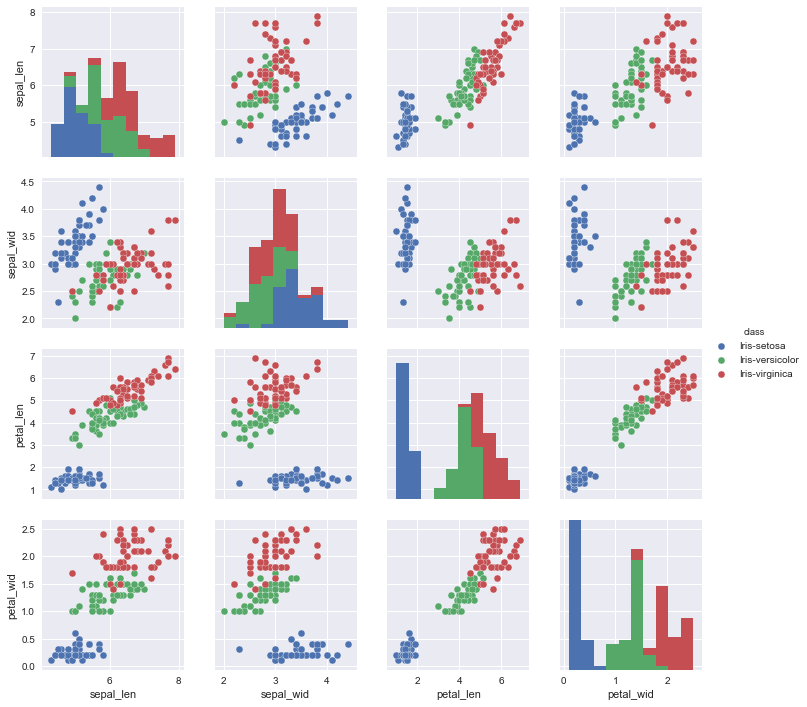

In [5]:
sns.pairplot(df, hue="class");

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
X_std = StandardScaler().fit_transform(X)
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

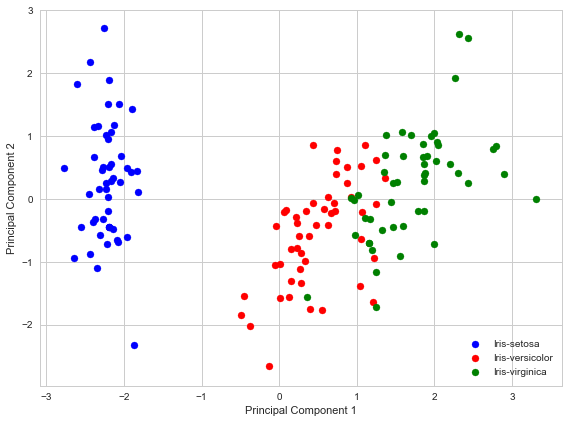

In [7]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

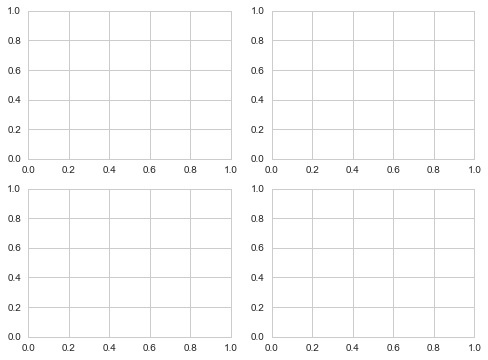

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)

In [63]:

from sklearn.cluster import KMeans
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

X_std = StandardScaler().fit_transform(X)
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(Y_sklearn)

pc_groups = {'PC1' : Y_sklearn[:,0],
             'PC2' : Y_sklearn[:,1],
             'Name': y,
             'Groups' : clusters.labels_.astype(str)}
pc_group_df = pd.DataFrame(pc_groups)


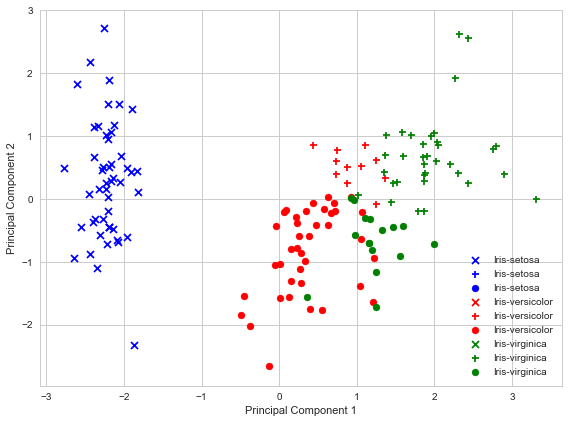

In [123]:
# iterative filter function
def filter_df(df, *args):
    for k, v in args:
        df = df[df[k] == v]
    return df

keys = pc_group_df['Groups'].unique()
values = ('x','+','o')
marker = {}
junk = map(lambda k, v: marker.update({k: v}), keys, values)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((pc_group_df['Name'].unique()),
                        ('blue', 'red', 'green','black','pink','cyan','orange','purple')):
        for group in pc_group_df['Groups'].unique():
            plt.scatter(filter_df(pc_group_df, ('Groups',group),('Name',lab))['PC1'],
                        filter_df(pc_group_df, ('Groups',group),('Name',lab))['PC2'],
                        label=lab,
                        c=col, marker = marker[group])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()